In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

In [ ]:
arquivo_csv = r'C:\Users\kalve\Documents\damage-controller\backend\Banco_de_Dados 2.CSV'



df = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')

import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')



C:\Users\kalve\AppData\Local\Temp\ipykernel_5612\3403690420.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo_csv, encoding='latin1', sep=';', on_bad_lines='skip')


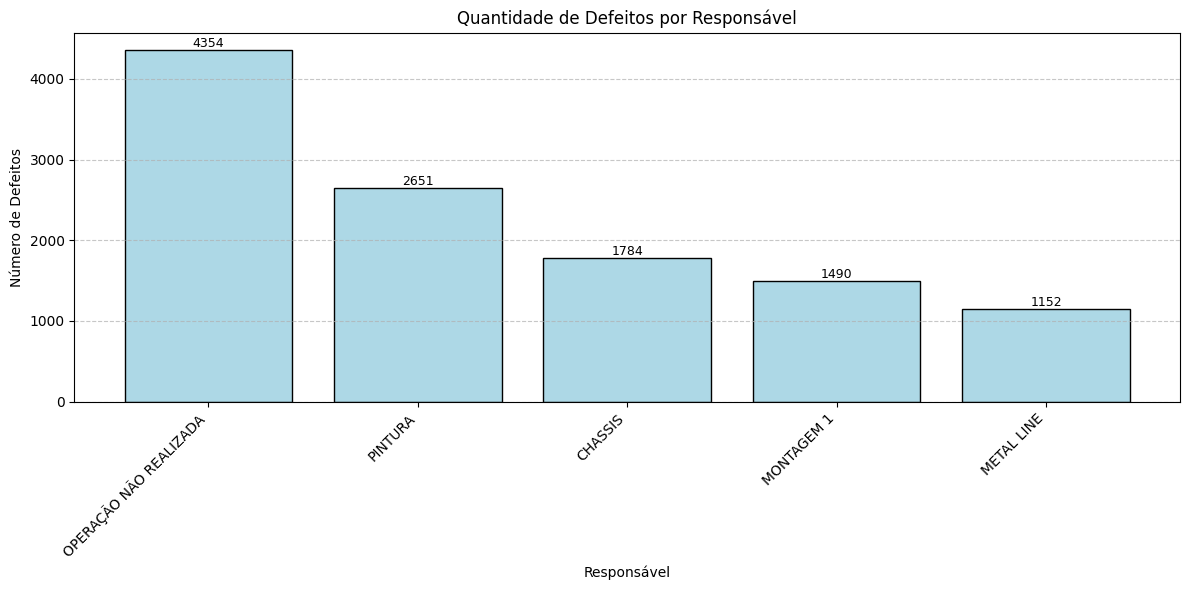

In [89]:
#responsável por defeitos

df['RESPONSÁVEL'] = df['RESPONSÁVEL'].fillna('')
df['DEFEITOS'] = df['DEFEITOS'].fillna('')

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO')
]


contagem = df_filtrado['RESPONSÁVEL'].value_counts().head(5)


plt.figure(figsize=(12, 6))
bars = plt.bar(contagem.index, contagem.values, color='lightblue', edgecolor='black')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)


plt.title('Quantidade de Defeitos por Responsável')
plt.xlabel('Responsável')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_5612\3751701847.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['DIA'] = df_filtrado['DATA'].dt.day


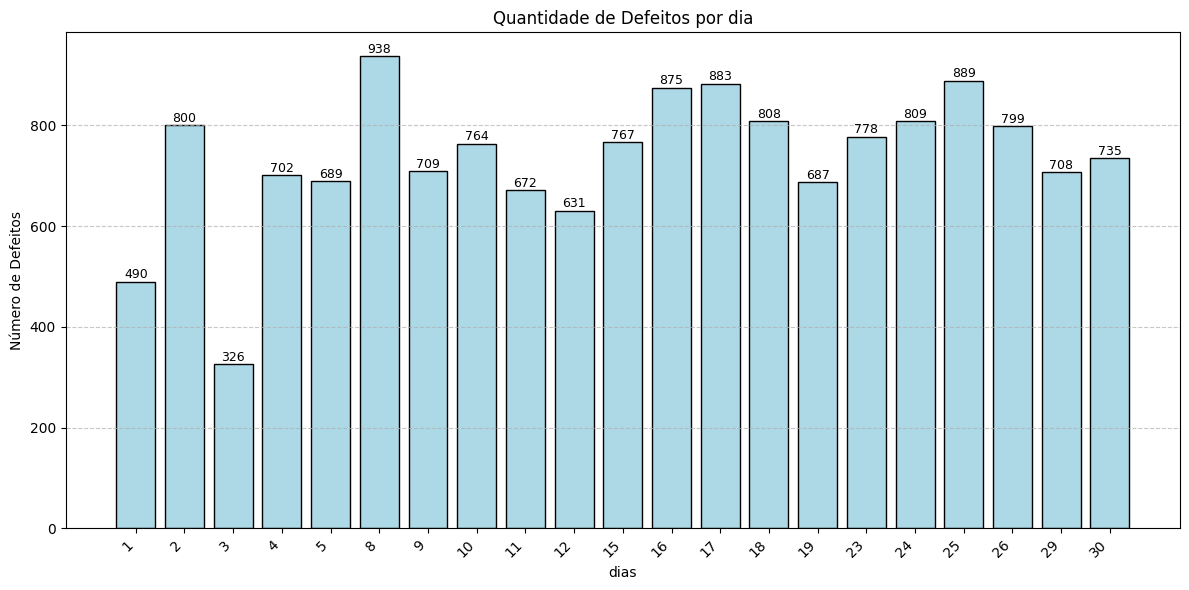

In [ ]:
#defeitos por dia

df['DEFEITOS'] = df['DEFEITOS'].fillna('')
df['DATA'] = df['DATA'].fillna('')
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')
mes_desejado = 4

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO') &
    (df['DATA'].notna()) &
    (df['DATA'].dt.month == mes_desejado)
]

df_filtrado['DIA'] = df_filtrado['DATA'].dt.day

contagem = df_filtrado['DIA'].value_counts().sort_index()

categorias = contagem.index.astype(str)
valores = contagem.values

plt.figure(figsize=(12, 6))
bars = plt.bar(categorias, valores, color='lightblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
    
plt.title('Quantidade de Defeitos por dia')
plt.xlabel('dias')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\kalve\AppData\Local\Temp\ipykernel_5612\2945368707.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MES'] = df_filtrado['DATA'].dt.month


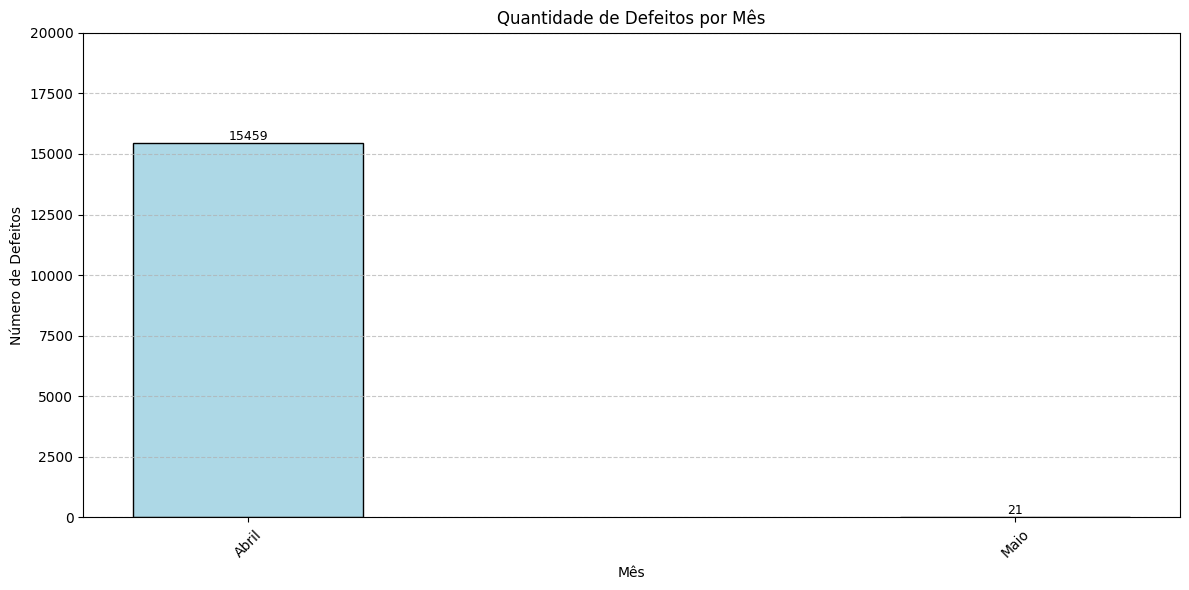

In [27]:
#defeitos por mês

df['DEFEITOS'] = df['DEFEITOS'].fillna('')
df['DATA'] = df['DATA'].fillna('')
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True, errors='coerce')

df_filtrado = df[
    (df['DEFEITOS'].str.strip() != '') &
    (df['DEFEITOS'].str.strip().str.upper() != 'O SEM DEFEITO') &
    (df['DATA'].notna())
]

df_filtrado['MES'] = df_filtrado['DATA'].dt.month

contagem = df_filtrado['MES'].value_counts().sort_index()

categorias = [calendar.month_name[mes].capitalize() for mes in contagem.index]
valores = contagem.values

plt.figure(figsize=(12, 6))
bars = plt.bar(categorias, valores, color='lightblue', edgecolor='black',width=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.title('Quantidade de Defeitos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Defeitos')
plt.xticks(rotation=45, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0,20000)
plt.show()
